In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/phone_prices

/gdrive/MyDrive/phone_prices


In [4]:
ls

test.csv  train.csv


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [7]:
df_train=pd.read_csv('train.csv')
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.495000,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.500100,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# EDA

In [10]:
df_train.isna().sum().sum()

0

In [11]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
df_train.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [14]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [15]:
binary_cols

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

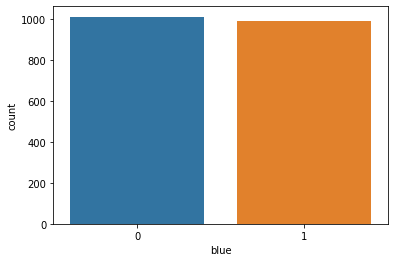

In [16]:
sns.countplot("blue", data=df_train)

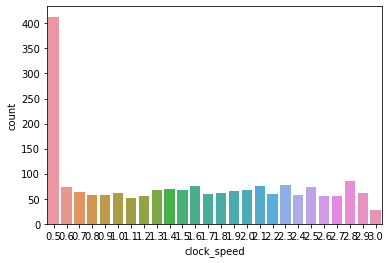

In [18]:
sns.countplot("clock_speed", data=df_train)

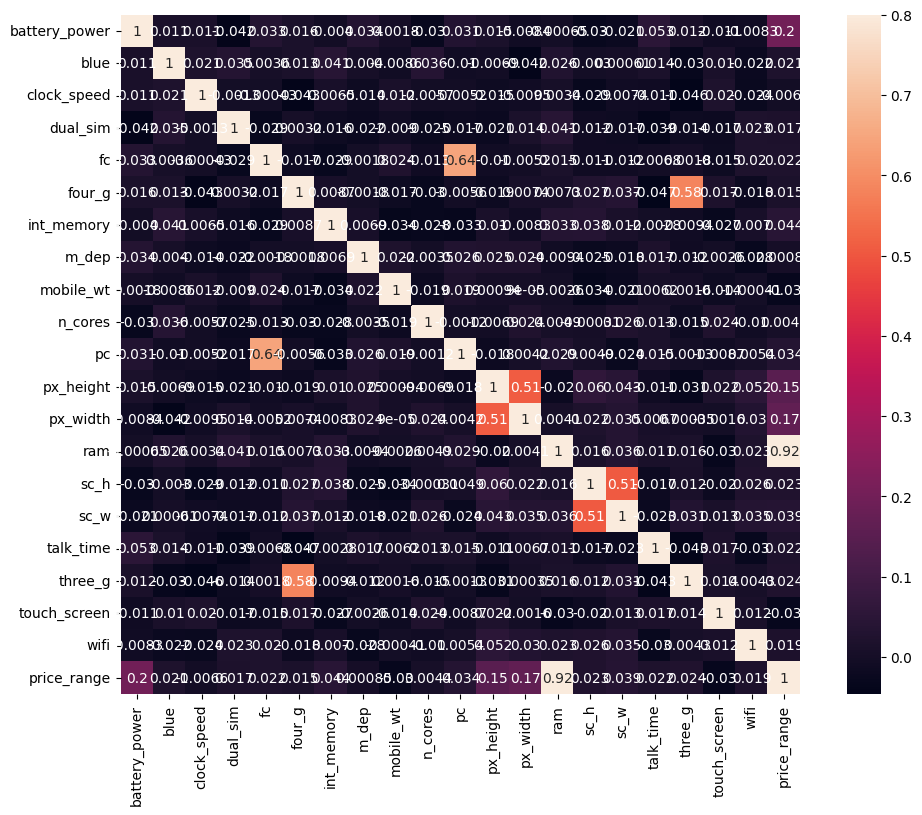

In [19]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

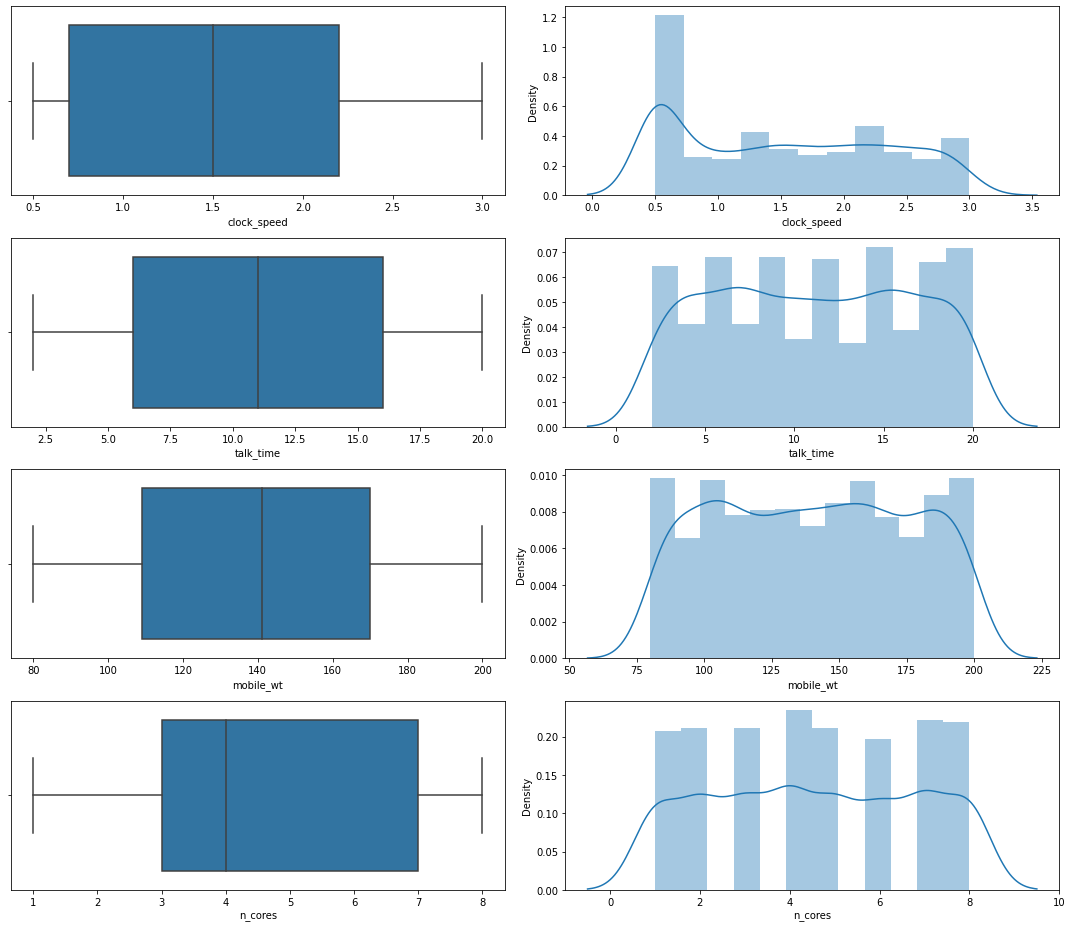

In [20]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df_train["clock_speed"], ax = ax[0,0])
sns.distplot(df_train['clock_speed'], ax = ax[0,1])
sns.boxplot(x= df_train["talk_time"], ax = ax[1,0])
sns.distplot(df_train['talk_time'], ax = ax[1,1])
sns.boxplot(x= df_train["mobile_wt"], ax = ax[2,0])
sns.distplot(df_train['mobile_wt'], ax = ax[2,1])
sns.boxplot(x= df_train["n_cores"], ax = ax[3,0])
sns.distplot(df_train['n_cores'], ax = ax[3,1])
plt.tight_layout()

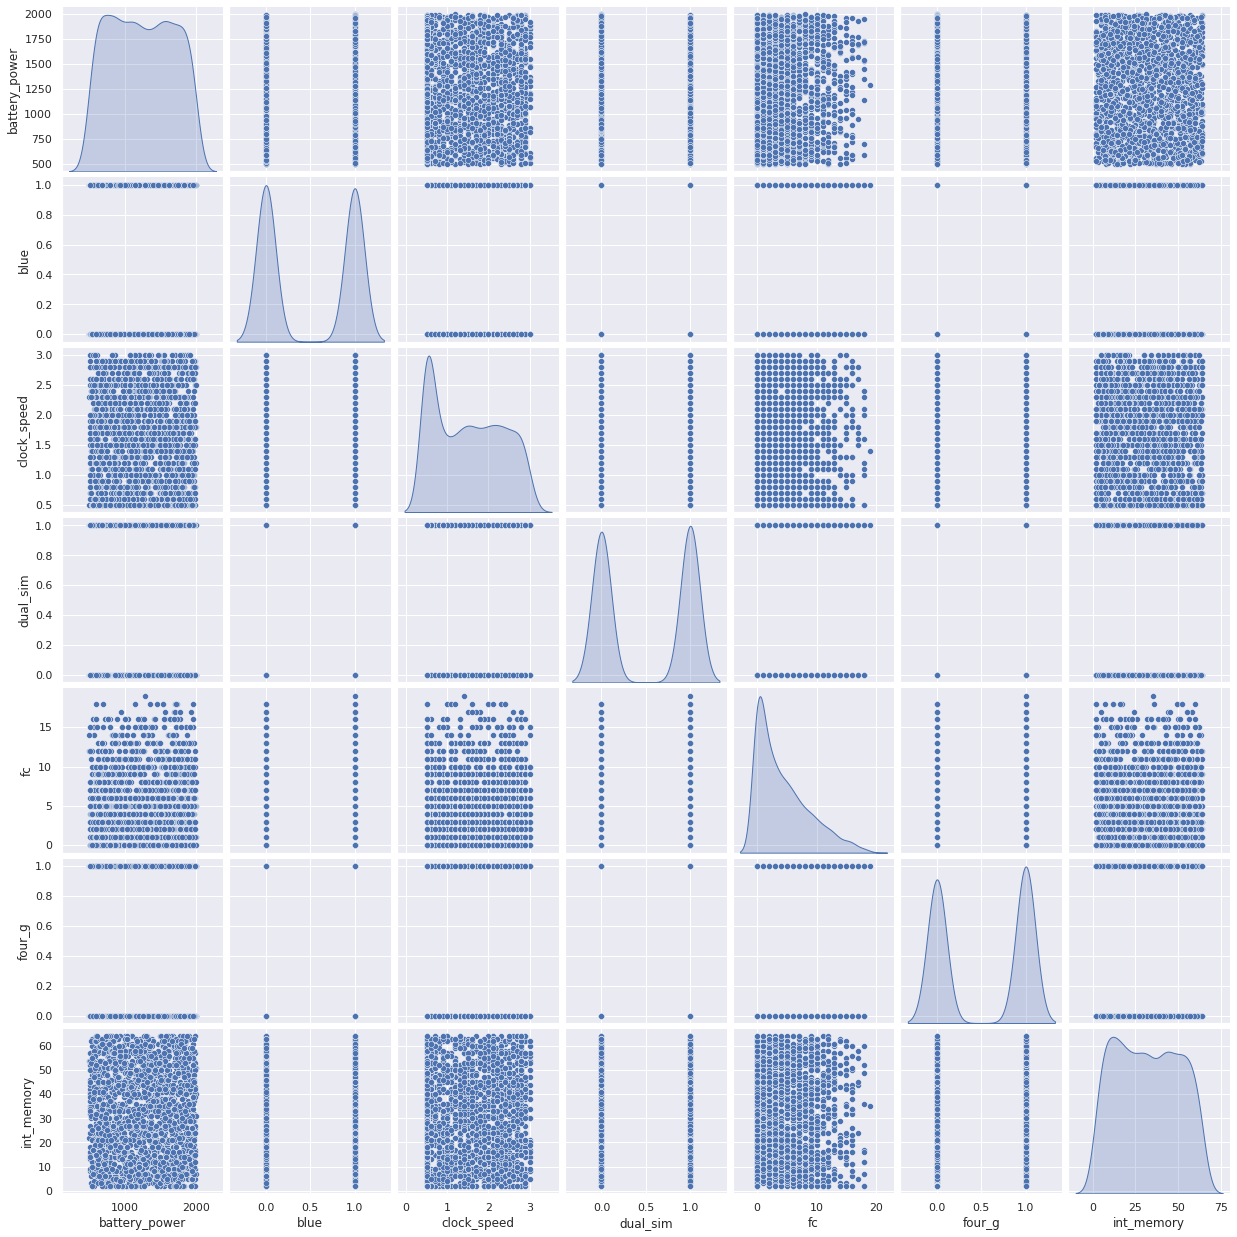

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [22]:
X = df_train.drop(['price_range'], axis = 1)
Y = df_train["price_range"]
x_Data = X.values
y_Data = Y.values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [28]:
model.score(X_test,y_test)

0.7975

In [29]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.81875  0.8125   0.79375  0.7625   0.796875]


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.81875

In [32]:
confusion_matrix(y_train, pred)

array([[354,  41,   0,   0],
       [ 29, 308,  72,   0],
       [  0,  70, 301,  37],
       [  0,   1,  40, 347]])

In [33]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [34]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [35]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.77      0.68      0.72        91
           2       0.64      0.77      0.70        92
           3       0.88      0.81      0.85       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.80      0.80       400



In [36]:
cma = confusion_matrix(y_test, predicted_test)

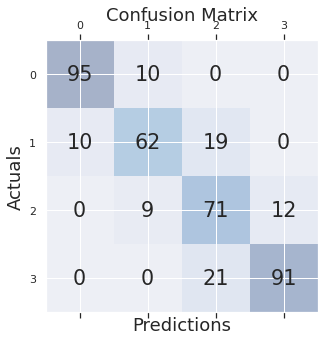

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier as rf

In [39]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [40]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

1.0

In [41]:
confusion_matrix(y_train, pred)

array([[395,   0,   0,   0],
       [  0, 409,   0,   0],
       [  0,   0, 408,   0],
       [  0,   0,   0, 388]])

In [42]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [43]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [44]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.82      0.87      0.84        91
           2       0.82      0.82      0.82        92
           3       0.95      0.91      0.93       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [45]:
cma = confusion_matrix(y_test, pred_test)

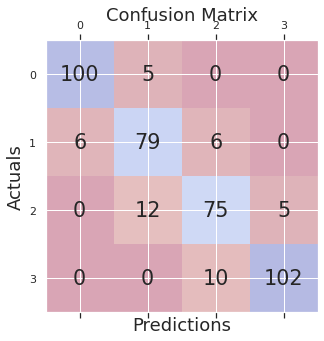

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [47]:
from sklearn import tree

In [48]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [49]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [50]:
confusion_matrix(y_train, pred1)

array([[395,   0,   0,   0],
       [  0, 409,   0,   0],
       [  0,   0, 408,   0],
       [  0,   0,   0, 388]])

In [51]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [52]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       105
           1       0.72      0.84      0.78        91
           2       0.76      0.66      0.71        92
           3       0.86      0.89      0.88       112

    accuracy                           0.82       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400



In [53]:
cma = confusion_matrix(y_test, pred1_test)

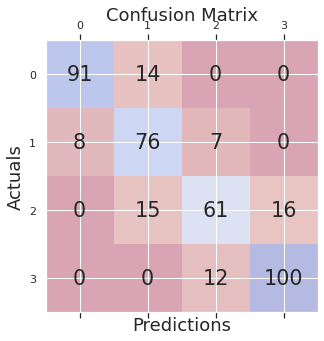

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [56]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.635625

In [57]:
confusion_matrix(y_train, pred_LR)

array([[307,  83,   5,   0],
       [ 66, 227,  95,  21],
       [  1,  95, 192, 120],
       [  0,   1,  96, 291]])

In [58]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [59]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



In [60]:
cma = confusion_matrix(y_test, pred_LR_test)

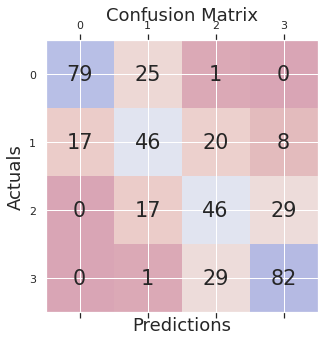

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [62]:
from sklearn.neural_network import MLPClassifier

In [63]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [64]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.255625

In [65]:
confusion_matrix(y_train, pred_NN)

array([[  0, 395,   0,   0],
       [  0, 409,   0,   0],
       [  0, 408,   0,   0],
       [  0, 388,   0,   0]])

In [66]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [67]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.23      1.00      0.37        91
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00       112

    accuracy                           0.23       400
   macro avg       0.06      0.25      0.09       400
weighted avg       0.05      0.23      0.08       400



In [68]:
cma = confusion_matrix(y_test, pred_NN_test)

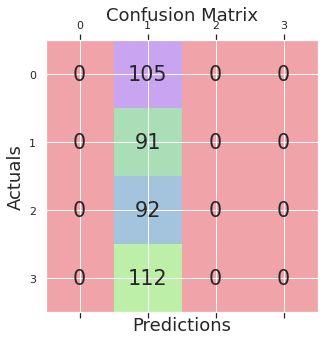

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [70]:
import xgboost as xgb

In [71]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [72]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.983125

In [73]:
confusion_matrix(y_train, pred_XGB)

array([[393,   2,   0,   0],
       [  3, 399,   7,   0],
       [  0,   7, 401,   0],
       [  0,   0,   8, 380]])

In [74]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [75]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.84      0.90      0.87        91
           2       0.82      0.83      0.82        92
           3       0.94      0.90      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [76]:
cma = confusion_matrix(y_test, pred_XGB_test)

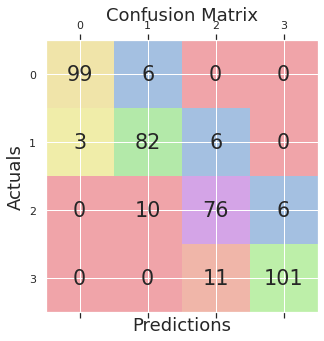

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

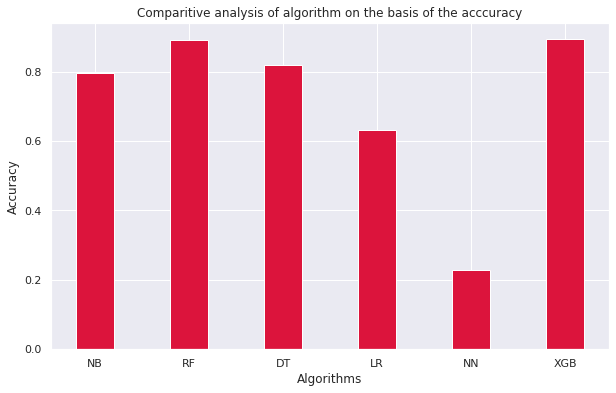

In [78]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


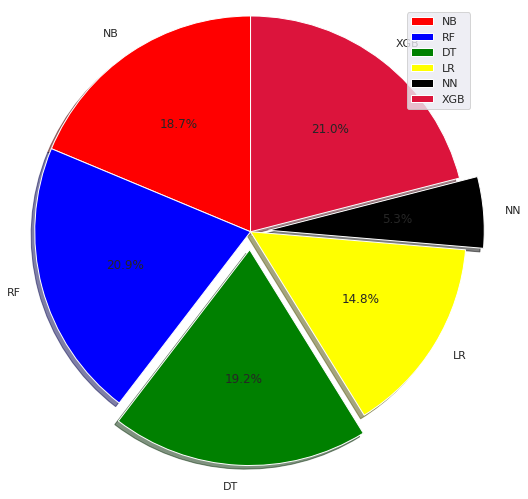

In [79]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [80]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']